# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
# Importing naumpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd


In [3]:
sales = pd.read_csv('Sales.csv')
sales

,Unnamed: 0,Unnamed: 0.1,Cust_ID,Acct_ID,Acct_Desc,Inv_Num,Inv_Date,Debit_Amt,Credit_Amt,Last_Inv_Date,Sales_Rep_ID,Job_ID,Inv_Total_Credit,Inv_Total_Debit,Inv_Total_Sale,Repeat_Cust
0,52344,52351,103,30900,Sales - Grounds Maint,14493,2008-07-01,0.0,2174.74,2015-09-28,NaN,"08888-09,09-GRND. MAINT,00-REVENUE",2174.74,0.0,2174.74,n
1,52358,52365,103,30900,Sales - Grounds Maint,14581,2008-07-07,0.0,475.00,2015-09-28,NaN,"08888-09,09-GRND. MAINT,00-REVENUE",475.00,0.0,475.00,y
2,4526,4528,103,30200,Sales - Landscaping,14690,2008-07-31,0.0,921.25,2015-09-28,GEORGE,"08258-02GC,02-PLANTING,00-REVENUE",921.25,0.0,921.25,y
3,52404,52411,103,30900,Sales - Grounds Maint,14731,2008-08-01,0.0,2174.74,2015-09-28,GCP3,"08888-09,09-GRND. MAINT,00-REVENUE",2174.74,0.0,2174.74,y
4,52449,52456,103,30900,Sales - Grounds Maint,14831,2008-09-01,0.0,2174.74,2015-09-28,GCP3,"08888-09,09-GRND. MAINT,00-REVENUE",2174.74,0.0,2174.74,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32816,30215,30222,holyt,30800,Sales - Snow - Plowing,13424,2008-02-08,0.0,190.00,2008-03-12,SNOW/JEFF,"08STORM #13-02/06/08,08-SNOW REMOVAL,00-REVENUE",565.00,0.0,565.00,y
32817,30303,30310,holyt,30800,Sales - Snow - Plowing,13539,2008-02-19,0.0,380.00,2008-03-12,SNOW/JEFF,"08sTORM #14- 02/19/,08-SNOW REMOVAL,00-REVENUE",580.00,0.0,580.00,y
32818,30358,30365,holyt,30800,Sales - Snow - Plowing,13597,2008-02-25,0.0,190.00,2008-03-12,SNOW/JEFF,"08sTORM #15- 02/21/,08-SNOW REMOVAL,00-REVENUE",925.00,0.0,925.00,y
32819,30373,30380,holyt,30800,Sales - Snow - Plowing,13612,2008-02-25,0.0,190.00,2008-03-12,SNOW/JEFF,"08sTORM #16- 02/24/,08-SNOW REMOVAL,00-REVENUE",380.00,0.0,380.00,y


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

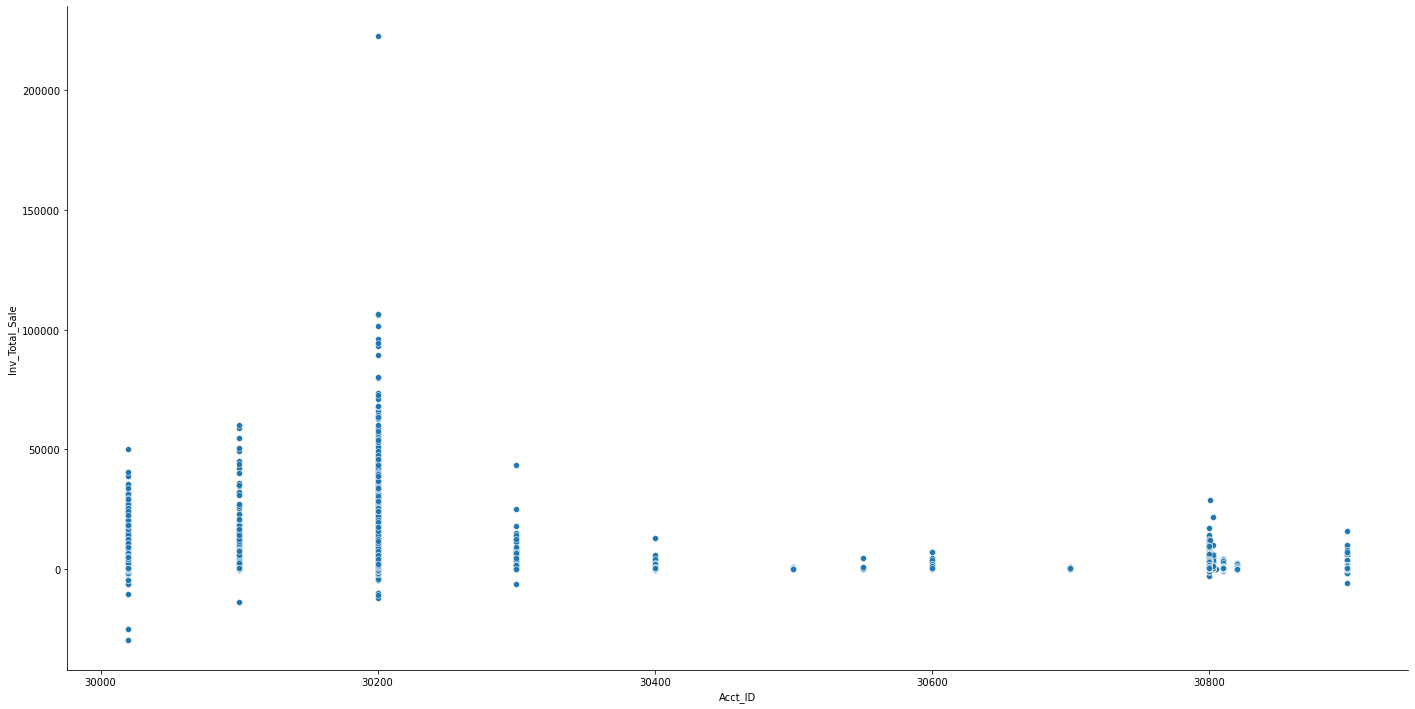

In [11]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(sales, x_vars=['Acct_ID'], 
             y_vars='Inv_Total_Sale', size=10, aspect=2, kind='scatter')
plt.show()

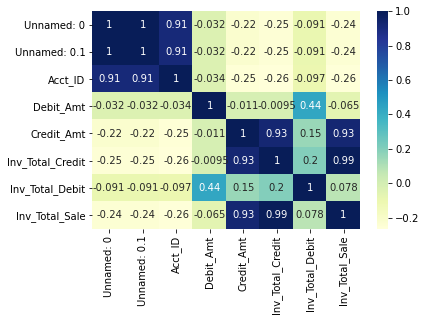

In [10]:
# Visualizing the data using heatmap
sns.heatmap(sales.corr(), cmap="YlGnBu", annot = True)
plt.show()


## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [21]:
# Step 1 is to assign your x and y
# Creating X and y
X = sales['Inv_Total_Credit']
y = sales['Inv_Total_Sale']
# Step 2 is to create your train and test sets
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [22]:
# Step 3 is to build the model. Remember to import any libraries you may need
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)# Step 3 is to build the model. Remember to import any libraries you may need


In [23]:
# Step 4 is to perform residual analysis
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const              -3.753708
Inv_Total_Credit    0.976798
dtype: float64

## Error Terms

Finally, plot your error terms!

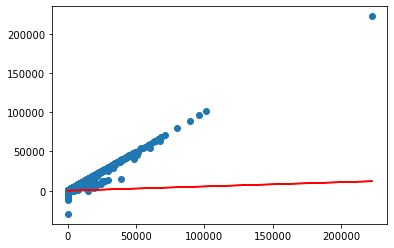

In [24]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.638
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not really

This really didn't make sense with my dataset.  Although total_credit and invoic_total had a close correlation there really is not a correlation since I used the debit and credit to calculate the total_Invoice sale